## CFN Problem Statement

### Objectives

1. Build prediction models to identify a new data vector causes churn rate.
2. Identify key drivers to customer churn from the data provided.




In [4]:
setwd("~/Desktop/CFN_ps")
given_data <- read.csv("masterdata_dummy.csv")
str(given_data)

#Setting a random seed for reproducibility
set.seed(82)



'data.frame':	98618 obs. of  24 variables:
 $ V1                    : int  595616 513771 511892 941641 1003212 957393 566981 210796 295072 215212 ...
 $ asOfDate              : Factor w/ 37 levels "01-05-2016","03-01-2016",..: 21 7 31 3 28 30 35 35 8 27 ...
 $ hits                  : int  0 0 0 1896 2745 262880 16 0 6350 0 ...
 $ prevhits              : int  0 0 3 1290 4714 268340 11 0 3632 0 ...
 $ currTickets           : int  0 0 4 0 0 0 0 0 0 0 ...
 $ prevTickets           : int  0 0 6 0 2 0 0 0 0 0 ...
 $ spamComplaints        : int  0 0 0 0 0 0 0 2 0 0 ...
 $ currLogins            : int  0 21 12 15 32 19 22 0 105 0 ...
 $ prevLogins            : int  0 25 54 25 3 40 5 3 33 0 ...
 $ broadcast4            : int  0 13 1 3 1 0 6 0 1 0 ...
 $ BroadCasts100_4weeks  : int  0 13 1 3 1 0 2 0 0 0 ...
 $ BroadCasts20_4weeks   : int  0 13 1 3 1 0 5 0 0 0 ...
 $ prevCamp10_4weeks     : int  0 0 2 0 0 0 0 0 0 0 ...
 $ Camp2_4weeks          : int  0 0 1 0 0 0 0 0 2 0 ...
 $ Camp100_4weeks       

Inferences :

24 Variables are present. The descriptions provided are as follows.



| Variable               | Definition                                                                 |
|------------------------|----------------------------------------------------------------------------|
| v1                     | unique identifier                                                          |
| asOfdate               | that day's date                                                            |
| hits                   | Rolling 28 day API hits                                                    |
| prevhits               | Prior rolling 28 day API hits                                              |
| currTickets            | Rolling 28 day support tickets (data is there only until 12/31/2015)       |
| prevTickets            | Prior rolling 28 day support tickets (data is there only until 12/31/2015) |
| spamComplaints         | No. of spam compaints for an app                                           |
| currLogins             | Rolling 28 day logins                                                      |
| prevLogins             | Prior rolling 28 day logins                                                |
| broadcast4             | last 4 weeks' email broadcasts                                             |
| broadcast100_4weeks    | last 4 weeks' broadcasts having 100+ contacts                              |
| broadcast20_4weeks     | last 4 weeks' broadcasts having 20+ contacts                               |
| prevcamp10_4week       | last 4 weeks' campaigns having 10+ contacts                                |
| camp2_4weeks           | last 4 weeks' campaigns published                                          |
| camp100_4weeks         | last 4 weeks' campaigns having 100+ contacts                               |
| camp20_4weeks          | last 4 weeks' campaigns having 20+ contacts                                |
| contacts_4weeks        | last 4 weeks' total contacts in apps                                       |
| ActiveDistinctContacts | rolling 30 days active contacts in campaigns                               |
| emailSent              | totl emails sent that day                                                  |
| Tasks                  | No. of Tasks created per app per day                                       |
| Tags                   | No. of Tags applied per app per day                                        |
| Opportunities          | No. of opportunities created per app per day                               |
| webForms               | No. of Web forms submitted per app per day                                 |
| status                 | 1: churned, 0: active                                                      |

Primary key is "id"

Target variable is "status"




In [5]:
given_data$asOfDate <- as.Date(given_data$asOfDate)
#Looking at the first 4 columns
summary(given_data[,1:4])

       V1             asOfDate             hits            prevhits      
 Min.   :      7   Min.   :1-05-20    Min.   :      0   Min.   :      0  
 1st Qu.: 251828   1st Qu.:8-05-20    1st Qu.:      0   1st Qu.:      0  
 Median : 500682   Median :15-05-20   Median :     31   Median :     22  
 Mean   : 501817   Mean   :16-02-08   Mean   :  25153   Mean   :  25814  
 3rd Qu.: 751604   3rd Qu.:24-01-20   3rd Qu.:   3789   3rd Qu.:   3713  
 Max.   :1004148   Max.   :31-07-20   Max.   :8507851   Max.   :9245065  

### Unique ID (V1)

In [6]:
length(unique(given_data$V1))
#Looks like there are duplicate rows. Unique ID is repeating.
#Storing the duplicated rows for any future purposes
dupes <- given_data[(duplicated(given_data$V1)),]

#Remove the duplicates
given_data <- unique(given_data)
dim(given_data)


[1] 94738

[1] 94738    24

### Date (asofDate)
Data dates range from May 1st 2016 to July 31st 2016

In [7]:
#Find the number of unique dates
length(unique(given_data$asOfDate))
#To find the frequency, check the frequency of each date
library(data.table)
uni_dates <- data.table(given_data)[,list(freq = .N),by = asOfDate]
uni_dates

[1] 37

,asOfDate,freq
1,-713209,2574
2,-717258,2583
3,-709861,2562
4,-718323,2518
5,-710743,2598
6,-710561,2588
7,-708796,2609
8,-716921,2558
9,-711353,2551
10,-719023,2543


* So, there are only 37 dates in the whole data set 
* Each date has close to 2600 entries
* One hypothesis that can be made here is that the data set is a snapshot at each of these dates from ~2600 users
* The difference in frequency could be due to churn and addition

### Hits and PrevHits

* Median is 30 and mean is 24966
* Shows that there is high variability. Take care of outliers


In [8]:
#Hits and PrevHits seems to follow the same pattern. Makes sense as it's a rolling count. (Only one value changes)
#Might be good to create a feature later as to whether the hits increased or decreased in the last cycle
cor(given_data$hits,given_data$prevhits)

#Histogram plots
hist(log10(given_data$hits),breaks = 100, main = "Histogram of log10(hits)")

[1] 0.903929

ERROR: Error in grDevices::replayPlot(obj): X11 font -adobe-helvetica-%s-%s-*-*-%d-*-*-*-*-*-*-*, face 2 at size 14 could not be loaded


Plot with title “Histogram of log10(hits)”

In [9]:
summary(given_data[,5:9])

  currTickets        prevTickets      spamComplaints       currLogins      
 Min.   :  0.0000   Min.   :  0.000   Min.   :   0.000   Min.   :    0.00  
 1st Qu.:  0.0000   1st Qu.:  0.000   1st Qu.:   0.000   1st Qu.:    1.00  
 Median :  0.0000   Median :  0.000   Median :   0.000   Median :   11.00  
 Mean   :  0.6101   Mean   :  0.685   Mean   :   4.187   Mean   :   56.46  
 3rd Qu.:  0.0000   3rd Qu.:  0.000   3rd Qu.:   0.000   3rd Qu.:   52.00  
 Max.   :106.0000   Max.   :133.000   Max.   :1704.000   Max.   :13646.00  
   prevLogins      
 Min.   :    0.00  
 1st Qu.:    0.00  
 Median :   11.00  
 Mean   :   55.89  
 3rd Qu.:   52.00  
 Max.   :17862.00  

In [10]:
hist(given_data$currTickets)
cor(given_data$currTickets,given_data$prevTickets)

#Histogram of tail of the currTicket
hist(given_data$currTickets[given_data$currTickets > 20,],breaks = 10)

[1] 0.8255276

ERROR: Error in given_data$currTickets[given_data$currTickets > 20, ]: incorrect number of dimensions


ERROR: Error in grDevices::replayPlot(obj): X11 font -adobe-helvetica-%s-%s-*-*-%d-*-*-*-*-*-*-*, face 2 at size 14 could not be loaded


Plot with title “Histogram of given_data$currTickets”

### currTickets and prevTickets
1. currTickets
* Median of 0 shows that there are lot of 0 values.
* Low mean and high "max" value shows there are some outliers.
* Histogram indicates that almost all values lie in the 0-10 bin
2. prevTickets 
* prevTickets follows the same distribution as currTickets
* High correlation
* Change in number of tickets could be a feature.


In [11]:
summary(given_data[,10:14])

   broadcast4       BroadCasts100_4weeks BroadCasts20_4weeks prevCamp10_4weeks 
 Min.   :   0.000   Min.   :  0.00       Min.   :  0.000     Min.   :  0.0000  
 1st Qu.:   0.000   1st Qu.:  0.00       1st Qu.:  0.000     1st Qu.:  0.0000  
 Median :   0.000   Median :  0.00       Median :  0.000     Median :  0.0000  
 Mean   :   2.927   Mean   :  1.93       Mean   :  2.356     Mean   :  0.3798  
 3rd Qu.:   2.000   3rd Qu.:  1.00       3rd Qu.:  1.000     3rd Qu.:  0.0000  
 Max.   :1172.000   Max.   :599.00       Max.   :646.000     Max.   :202.0000  
  Camp2_4weeks    
 Min.   :  0.000  
 1st Qu.:  0.000  
 Median :  0.000  
 Mean   :  0.561  
 3rd Qu.:  0.000  
 Max.   :380.000  

In [12]:
summary(given_data[,15:17])

 Camp100_4weeks     Camp20_4weeks      Contacts_4weeks   
 Min.   :  0.0000   Min.   :  0.0000   Min.   :     0.0  
 1st Qu.:  0.0000   1st Qu.:  0.0000   1st Qu.:     0.0  
 Median :  0.0000   Median :  0.0000   Median :    11.0  
 Mean   :  0.2318   Mean   :  0.3346   Mean   :   594.6  
 3rd Qu.:  0.0000   3rd Qu.:  0.0000   3rd Qu.:    95.0  
 Max.   :202.0000   Max.   :202.0000   Max.   :979315.0  

In [13]:
summary(given_data[,18:23])

 ActiveDistinctContacts   emailSent           Tasks               Tags        
 Min.   :     0         Min.   :      0   Min.   :     0.0   Min.   :      0  
 1st Qu.:     0         1st Qu.:      0   1st Qu.:     0.0   1st Qu.:      0  
 Median :    12         Median :     61   Median :     0.0   Median :     22  
 Mean   :  2230         Mean   :  27765   Mean   :   260.9   Mean   :   5925  
 3rd Qu.:   302         3rd Qu.:   2378   3rd Qu.:    22.0   3rd Qu.:    441  
 Max.   :893602         Max.   :8126125   Max.   :406874.0   Max.   :9395961  
 NA's   :4149           NA's   :445       NA's   :445        NA's   :445      
 Opportunities         WebForms       
 Min.   :    0.00   Min.   :     0.0  
 1st Qu.:    0.00   1st Qu.:     0.0  
 Median :    0.00   Median :     2.0  
 Mean   :   17.08   Mean   :   314.1  
 3rd Qu.:    0.00   3rd Qu.:    40.0  
 Max.   :36741.00   Max.   :270739.0  
 NA's   :445        NA's   :445       

There seems to be 445 NA's in the last 5 variables provided. This could be the same rows. Will check that.

In [19]:
given_data[is.na(given_data$emailSent),c(1,2,19:24)]
#Checking the churn ratio in this incomplete data subset
sum(given_data[is.na(given_data$emailSent),c(1,2,19:24)]$status)/nrow(given_data[is.na(given_data$emailSent),c(1,2,19:24)])
#39.7% churn ratio in this small data subset. Shows the significance.

na_data <- given_data[is.na(given_data),]
given_data <- na.omit(given_data)

,V1,asOfDate,emailSent,Tasks,Tags,Opportunities,WebForms,status
54,325538,28-02-20,NA,NA,NA,NA,NA,0
132,401698,11-09-20,NA,NA,NA,NA,NA,0
519,902829,18-09-20,NA,NA,NA,NA,NA,0
789,215976,18-09-20,NA,NA,NA,NA,NA,0
858,877814,3-07-20,NA,NA,NA,NA,NA,1
1346,683498,17-04-20,NA,NA,NA,NA,NA,1
1571,873399,13-03-20,NA,NA,NA,NA,NA,1
2115,882398,11-09-20,NA,NA,NA,NA,NA,1
3079,240326,14-02-20,NA,NA,NA,NA,NA,1
3201,770582,4-09-20,NA,NA,NA,NA,NA,0


[1] 0.3977528

In [20]:
summary(given_data$status)
#Number of status = 1 gives the total churn cases
sum(given_data$status)
#Check the overall churn ratio
sum(given_data$status)/nrow(given_data)
#8.9% . Shows that this is a highly imbalanced set

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.0891  0.0000  1.0000 

[1] 8032

[1] 0.08909793

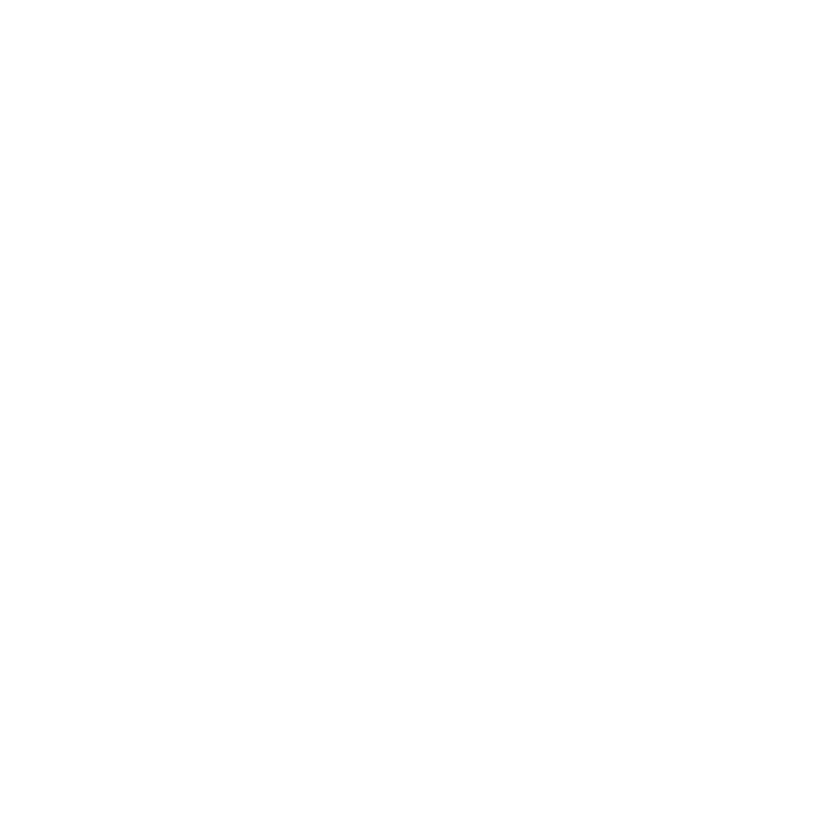

In [21]:

#Will analyse churn variable wise

dt <- data.table(given_data)
#Mean of the status variable is the churn ratio
churn_datewise <- dt[,j = mean(status),by = asOfDate]
library(ggplot2)
ggplot(churn_datewise,aes(asOfDate,V1)) + geom_point()


* There could be a slight positive variation with time in the churn ratio as seen in the plot. 

### Correlations with status
* A basic check to see if any variables have correlation with the churn

In [18]:
library("corrplot")
corrplot(cor(given_data[,-2]))

ERROR: Error in grDevices::replayPlot(obj): X11 font -adobe-helvetica-%s-%s-*-*-%d-*-*-*-*-*-*-*, face 1 at size 10 could not be loaded


Plot with title “”

### Exploring the positive class alone.


In [26]:
pos_class <- given_data[given_data$status == 1,]

,V1,asOfDate,hits,prevhits,currTickets,prevTickets,spamComplaints,currLogins,prevLogins,broadcast4,⋯,Camp100_4weeks,Camp20_4weeks,Contacts_4weeks,ActiveDistinctContacts,emailSent,Tasks,Tags,Opportunities,WebForms,status
2,513771,6-03-20,0,0,0,0,0,21,25,13,⋯,0,0,0,36,23914,0,2,0,0,1
20,449293,29-05-20,16276,12493,4,1,0,84,78,3,⋯,0,0,18,200,254,86,87,2,124,1
27,822644,21-08-20,187,0,2,0,0,37,4,0,⋯,0,0,0,0,8,0,8,0,0,1
39,244501,6-03-20,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
47,827012,4-09-20,9441,8413,1,2,0,32,37,0,⋯,2,2,117,396,758,133,586,0,57,1
51,915755,17-01-20,0,0,0,0,0,11,14,1,⋯,0,0,4,11,99,9,10,1,4,1
67,233086,20-03-20,4889,5712,0,0,0,22,57,0,⋯,0,0,0,0,0,0,23,0,0,1
77,555017,22-05-20,6904,7648,0,2,0,5,6,0,⋯,0,1,0,7,5,0,7,0,2,1
85,128169,10-01-20,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,1
90,225832,20-03-20,0,0,0,0,0,8,5,1,⋯,1,1,1,282,1,283,566,0,0,1


In [27]:
summary(pos_class)

       V1             asOfDate             hits            prevhits      
 Min.   :    225   Min.   :1-05-20    Min.   :      0   Min.   :      0  
 1st Qu.: 261737   1st Qu.:8-05-20    1st Qu.:      0   1st Qu.:      0  
 Median : 513152   Median :14-08-20   Median :      0   Median :      0  
 Mean   : 509165   Mean   :15-12-20   Mean   :   7872   Mean   :   8128  
 3rd Qu.: 754410   3rd Qu.:24-04-20   3rd Qu.:    262   3rd Qu.:    315  
 Max.   :1003967   Max.   :31-07-20   Max.   :4800925   Max.   :4938501  
  currTickets       prevTickets       spamComplaints      currLogins     
 Min.   : 0.0000   Min.   :  0.0000   Min.   :   0.00   Min.   :   0.00  
 1st Qu.: 0.0000   1st Qu.:  0.0000   1st Qu.:   0.00   1st Qu.:   0.00  
 Median : 0.0000   Median :  0.0000   Median :   0.00   Median :   2.00  
 Mean   : 0.3055   Mean   :  0.3634   Mean   :   1.98   Mean   :  12.66  
 3rd Qu.: 0.0000   3rd Qu.:  0.0000   3rd Qu.:   0.00   3rd Qu.:   8.00  
 Max.   :93.0000   Max.   :113.0000   